In [7]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn.apionly as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from load_sim import load_sim
from preprocessing import get_train_test_sets
from features import get_training_features
from pipelines import get_pipeline
import plotting_functions as plotting
import data_functions as data_functions

%matplotlib inline

In [8]:
sns.set_palette('muted')
sns.set_color_codes()

In [9]:
df = load_sim()
print('# events = {}'.format(len(df)))

Cut event flow:
                   reco_exists:  0.645  0.645
                   reco_zenith:  0.809  0.597
                      num_hits:  0.625  0.579
                     IT_signal:  0.227  0.218
                StationDensity:  0.787  0.218
              reco_containment:    0.5  0.169
               max_charge_frac:  0.775  0.169
                  energy_range:  0.447  0.117


# events = 51608


In [10]:
feature_list, feature_labels = get_training_features()
num_features = len(feature_list)
X_train, X_test, y_train, y_test, le = get_train_test_sets(df, feature_list)

In [11]:
pipeline = get_pipeline('RF')
pipeline.fit(X_train, y_train)
scaler = pipeline.named_steps['scaler']
clf = pipeline.named_steps['classifier']
clf_name = clf.__class__.__name__

In [12]:
test_predictions = pipeline.predict(X_test)
test_acc = accuracy_score(y_test, test_predictions)
print('Test accuracy: {:.4%}'.format(test_acc))
train_predictions = pipeline.predict(X_train)
train_acc = accuracy_score(y_train, train_predictions)
print('Train accuracy: {:.4%}'.format(train_acc))

Test accuracy: 80.9856%
Train accuracy: 95.6595%


1) 0.286535083528
2) 0.227606474447
3) 0.186787932587
4) 0.164868612524
5) 0.134201896914


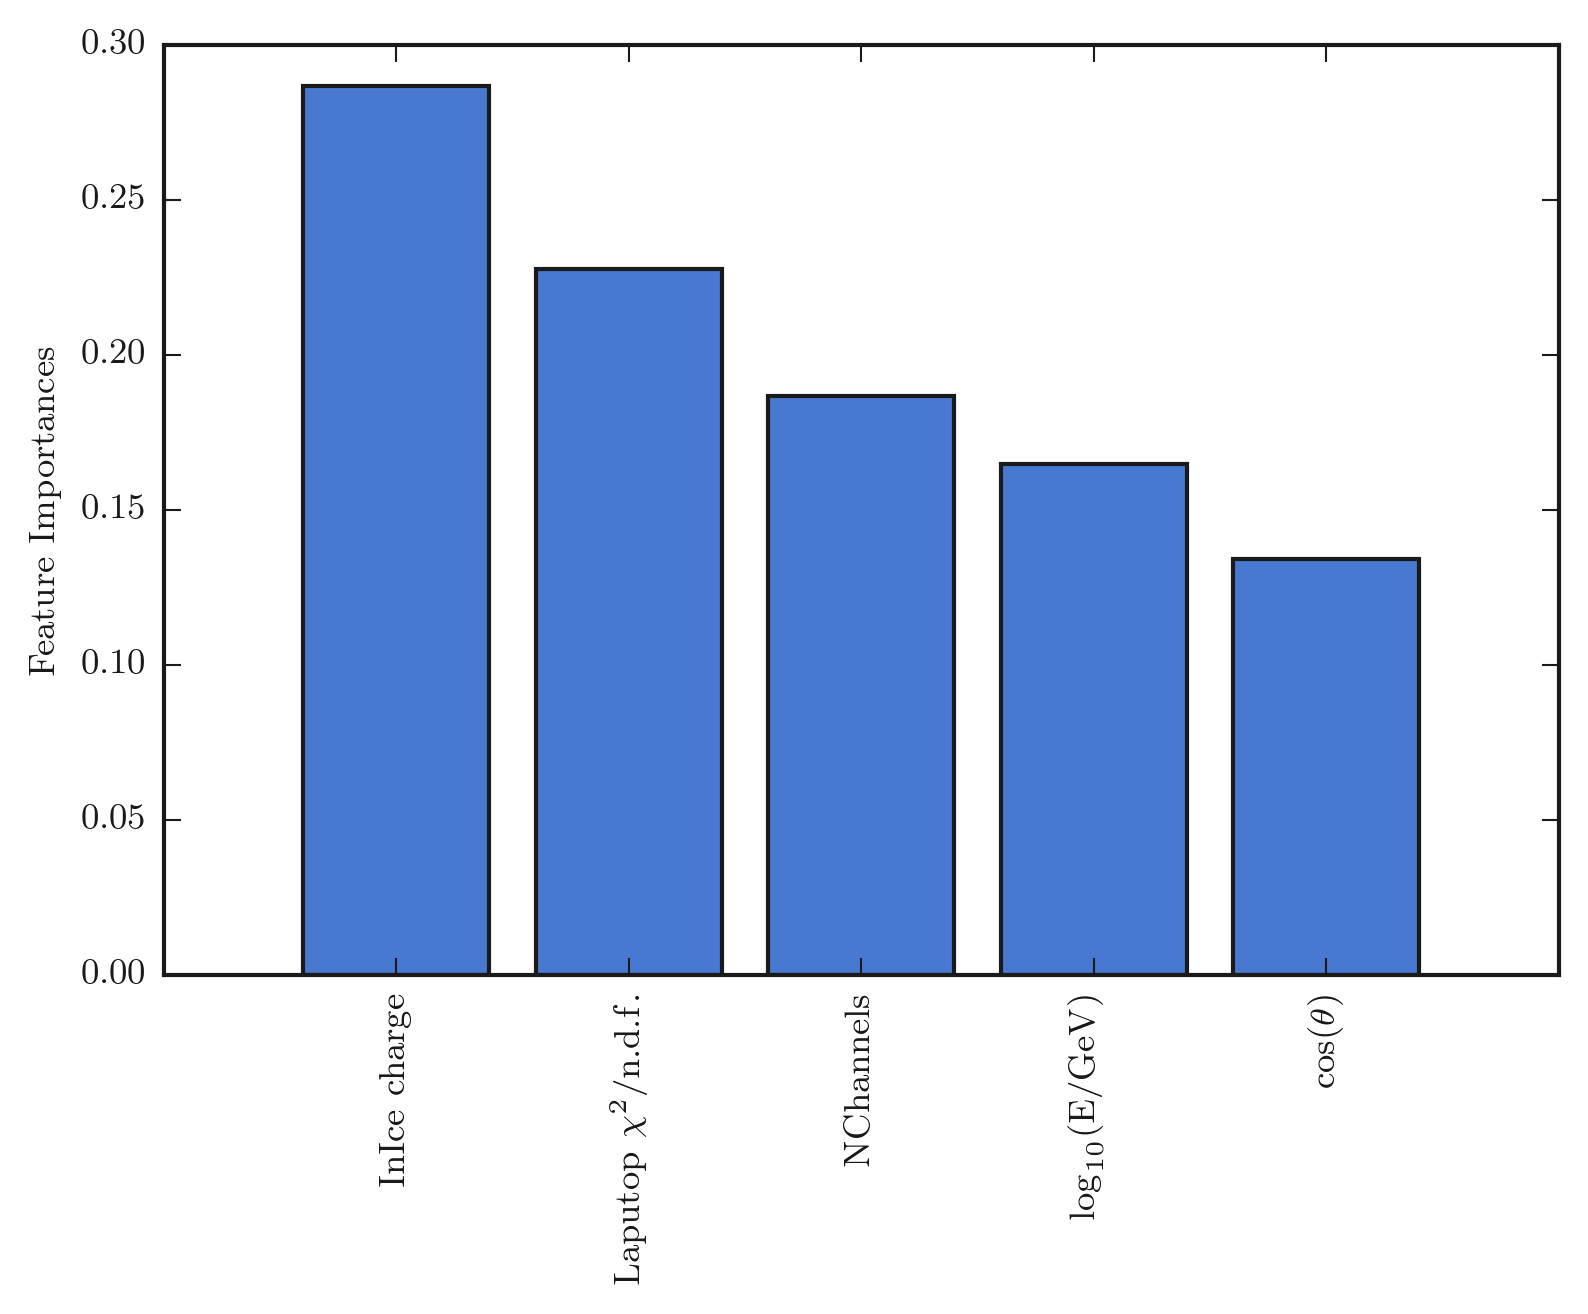

In [13]:
importances = pipeline.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots()
feature_labels = np.array(['$\\log_{10}({\mathrm{E/GeV})$', 'InIce charge',
                           '$\cos(\\theta)$', '$\mathrm{Laputop}\ \chi^2/\mathrm{n.d.f.}$', 'NChannels'])
for f in range(num_features):
    print('{}) {}'.format(f + 1, importances[indices[f]]))

plt.ylabel('Feature Importances')
plt.bar(range(num_features),
        importances[indices],
        align='center')

plt.xticks(range(num_features),
           feature_labels[indices], rotation=90)
plt.xlim([-1, len(feature_list)])
plt.show()

/home/jbourbeau/.local/lib/python2.7/site-packages/seaborn/matrix.py:143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if xticklabels == []:
/home/jbourbeau/.local/lib/python2.7/site-packages/seaborn/matrix.py:151: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if yticklabels == []:


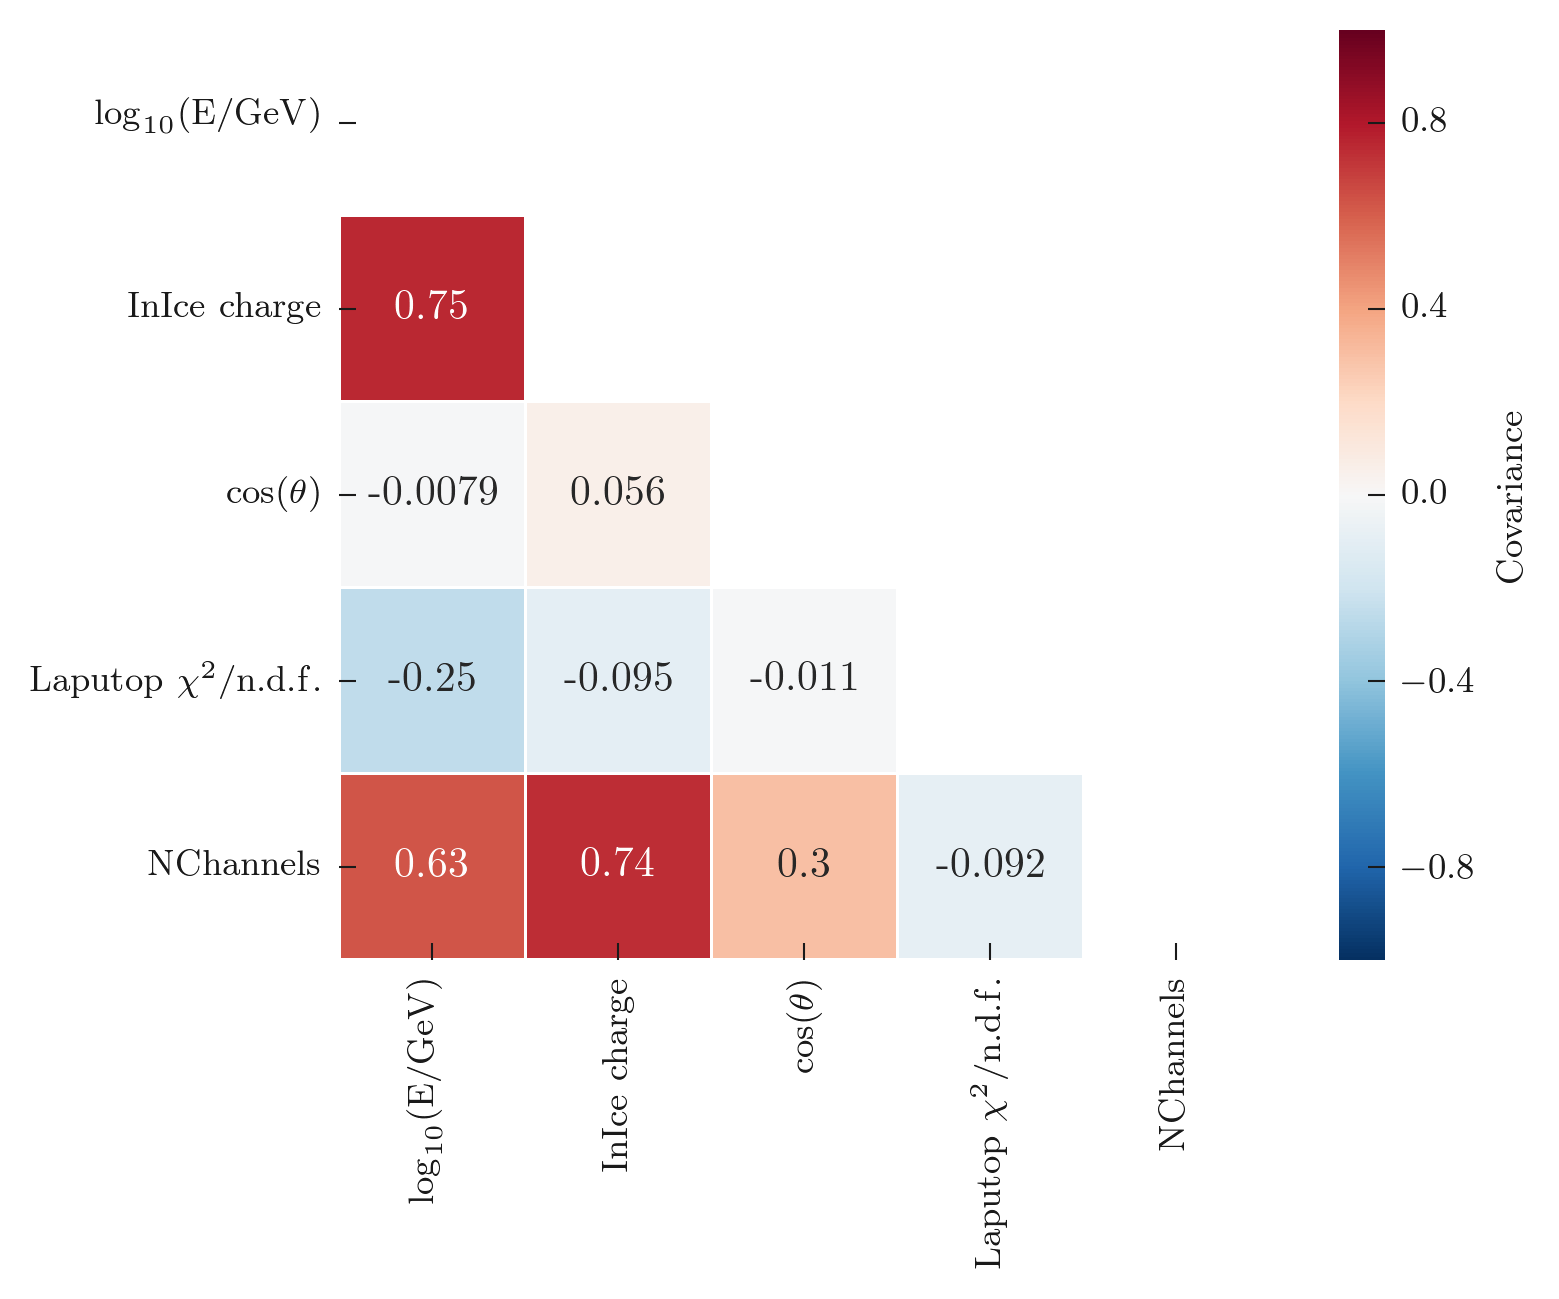

In [14]:
d = pd.DataFrame(df, columns=feature_list)
# Compute the correlation matrix
corr = d.corr().values
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots()
sns.heatmap(corr, mask=mask, cmap='RdBu_r', center=0,
            square=True, xticklabels=feature_labels, yticklabels=feature_labels,
            linewidths=.5, cbar_kws={'label': 'Covariance'}, annot=True, ax=ax)
plt.show()

In [15]:
corr = d.corr()

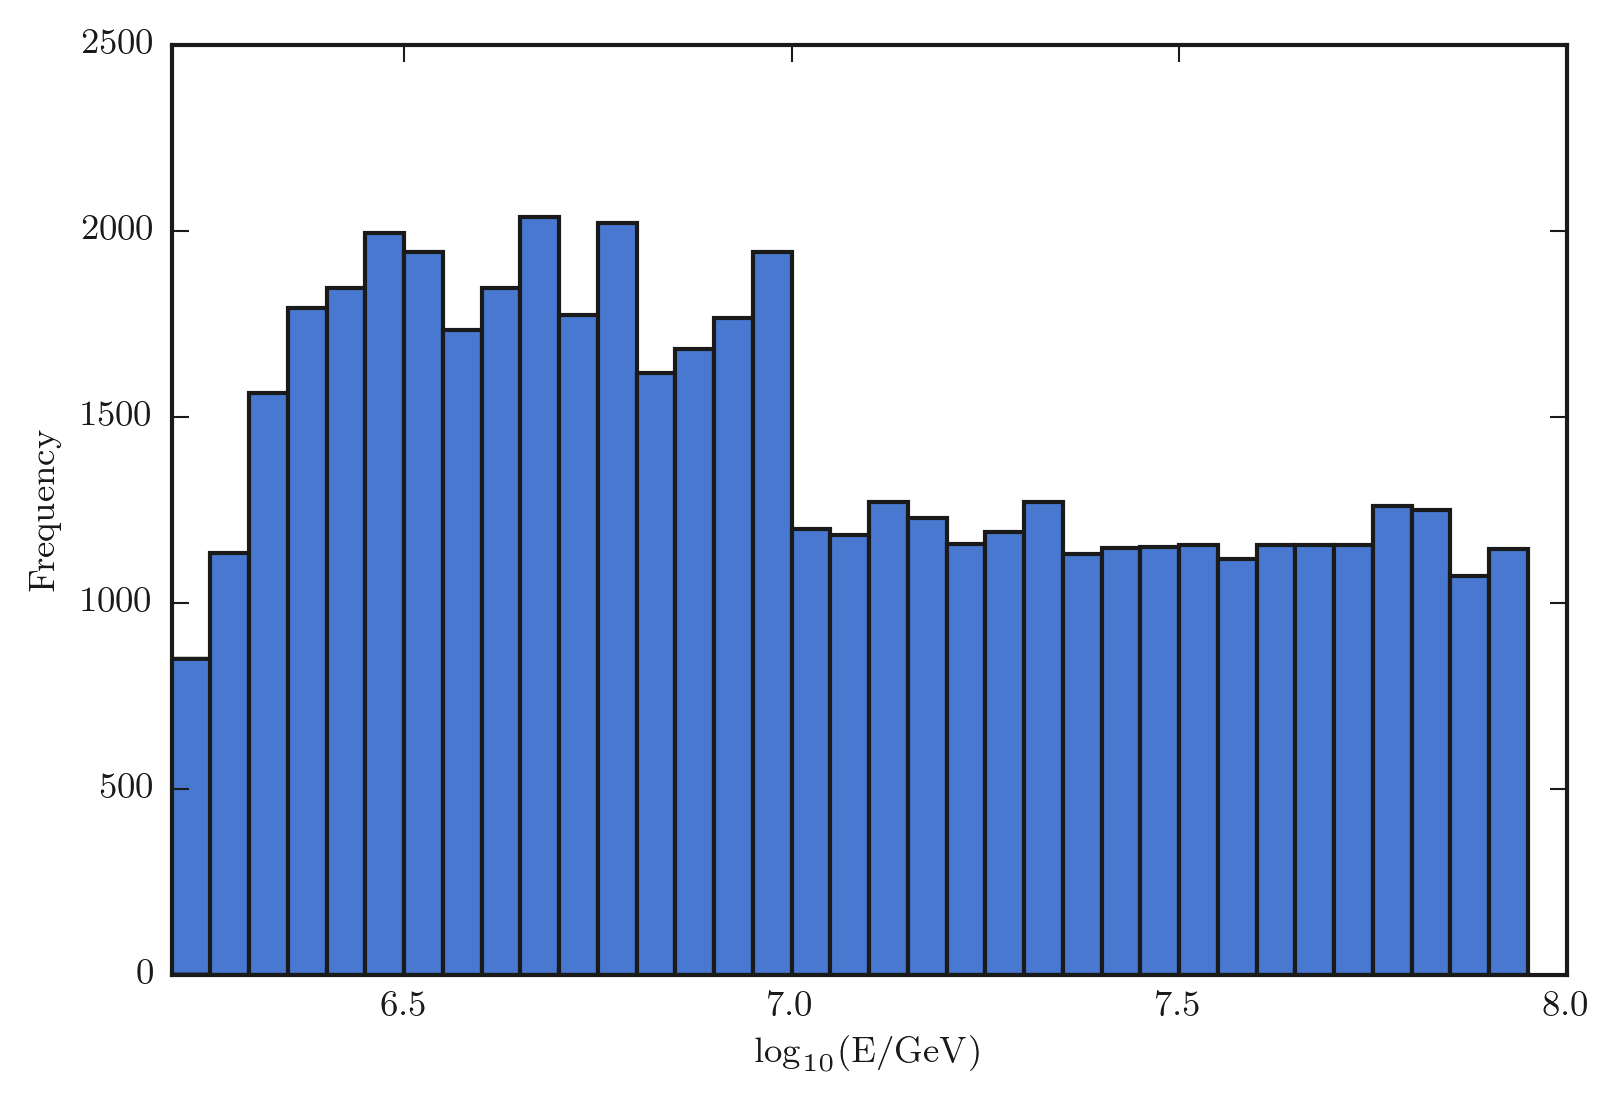

In [16]:
df.MC_log_energy.plot(kind='hist', xlim=[6.2, 8], bins=np.arange(6.2, 8, 0.05))
plt.xlabel('$\\log_{10}({\mathrm{E/GeV})$')

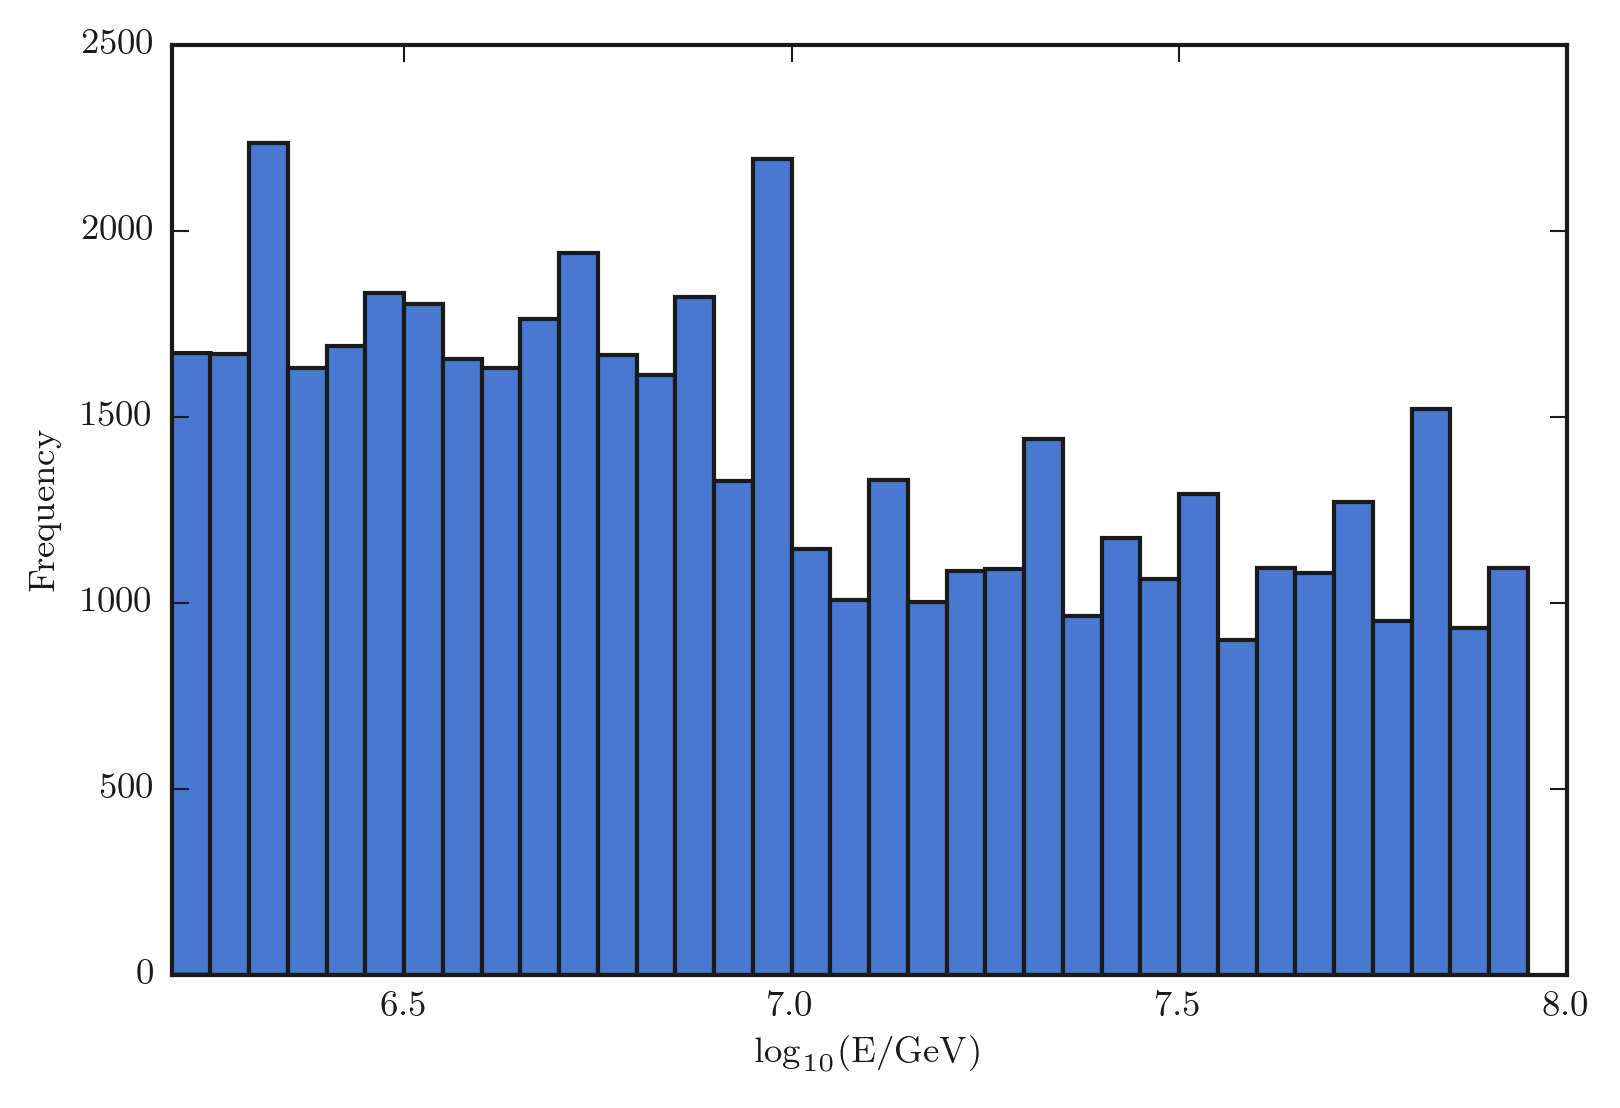

In [17]:
df.reco_log_energy.plot(kind='hist', xlim=[6.2, 8], bins=np.arange(6.2, 8, 0.05))
plt.xlabel('$\\log_{10}({\mathrm{E/GeV})$')

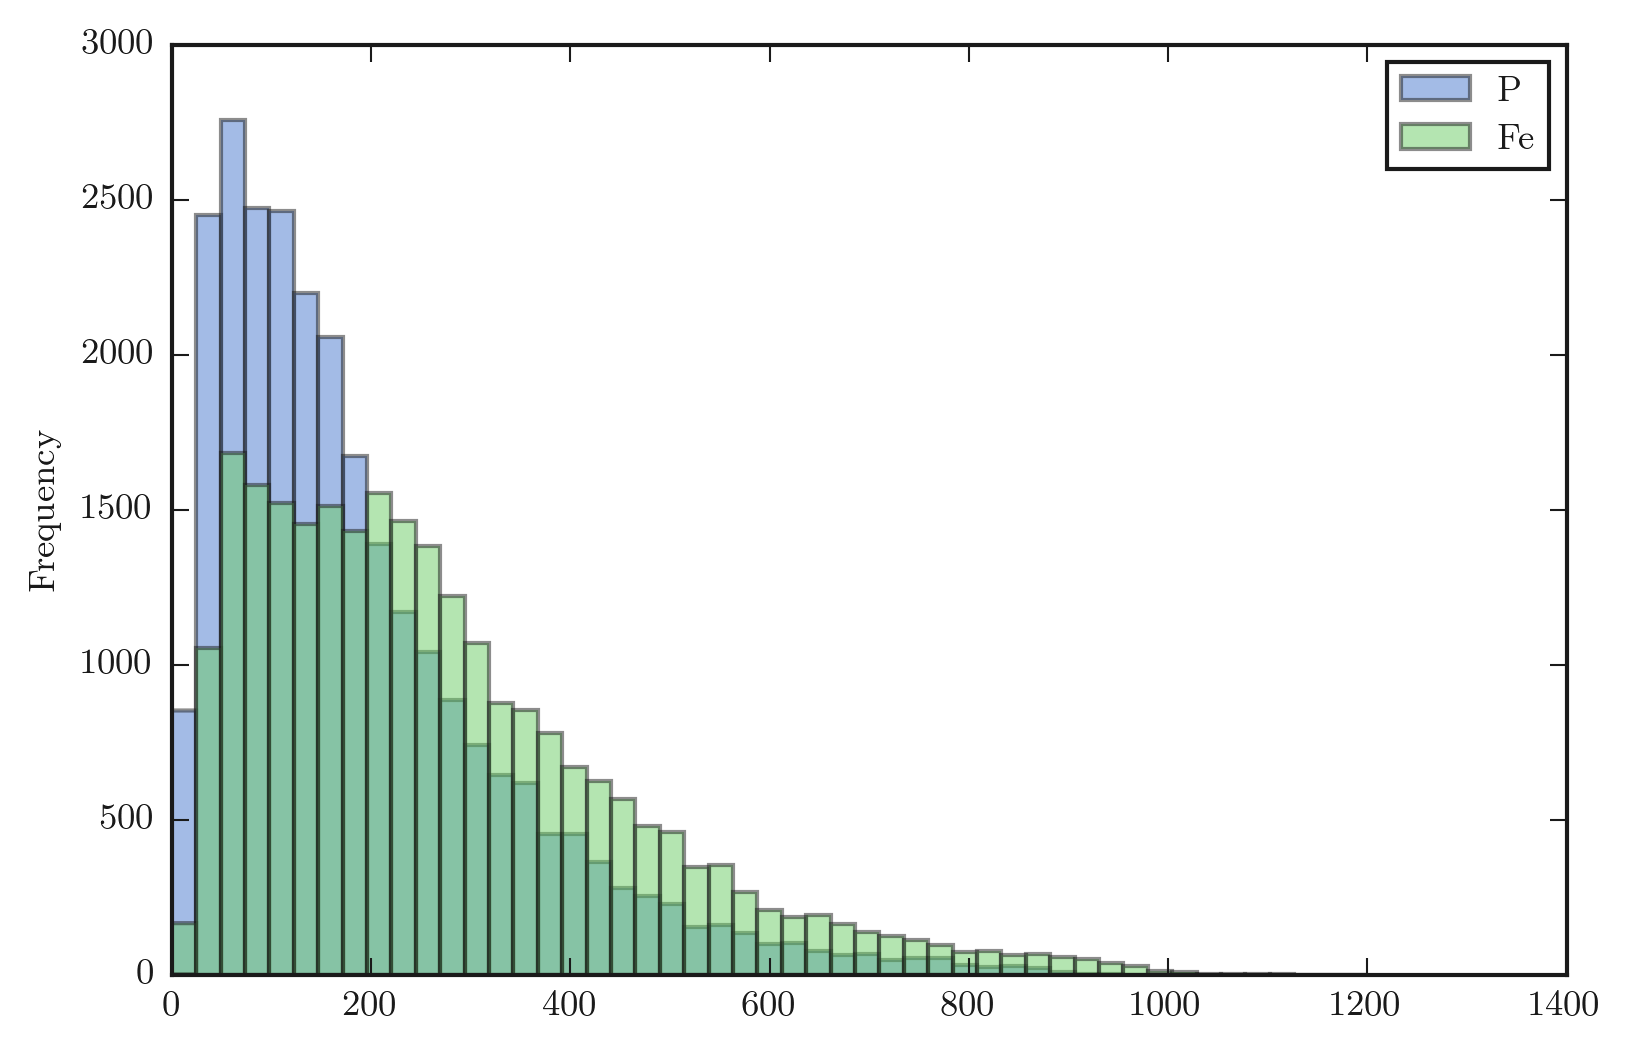

In [18]:
fig, ax = plt.subplots()
df.NChannels[df.MC_comp == 'P'].plot(kind='hist', bins=np.linspace(0, 1200, 50), alpha=0.5, label='P')
df.NChannels[df.MC_comp == 'Fe'].plot(kind='hist', bins=np.linspace(0, 1200, 50), alpha=0.5, label='Fe')
plt.legend()